In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
customer_df.isnull().sum()/len(customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [5]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [7]:
numerical_df=customer_df.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [8]:
def continuous_discrete(variable):
    unique_values = variable.nunique()
    if unique_values > 100:
        return 'continuous'
        
    else:
        return 'discrete'

In [51]:
deff=numerical_df.apply(continuous_discrete)
deff

customer_lifetime_value          continuous
income                           continuous
monthly_premium_auto             continuous
months_since_last_claim            discrete
months_since_policy_inception      discrete
number_of_open_complaints          discrete
number_of_policies                 discrete
total_claim_amount               continuous
dtype: object

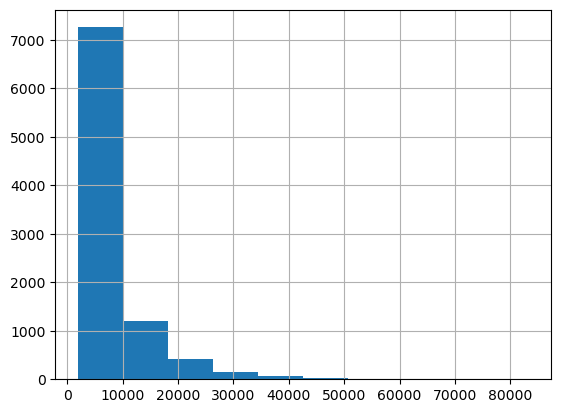

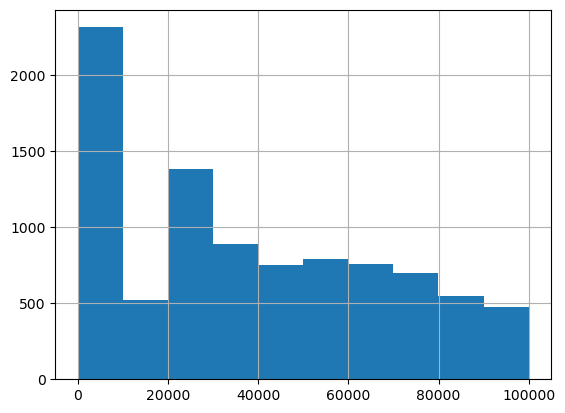

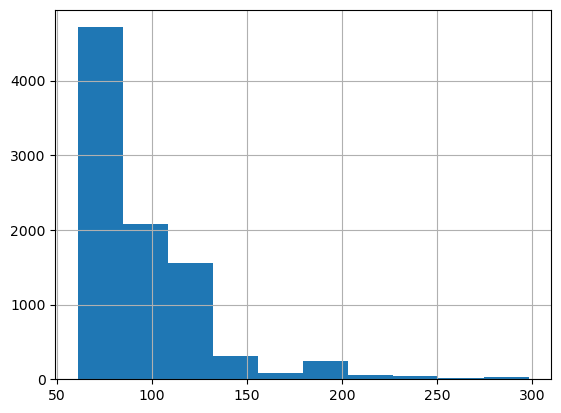

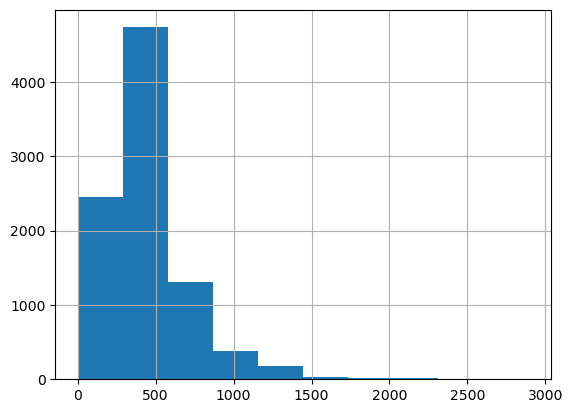

In [57]:
 
for col in con_list:
    numerical_df[col].hist(bins=10)
    plt.show()

In [62]:
con_list=[]
dis_list=[]

for col in numerical_df.columns:
        if numerical_df[col].nunique()> 100:
            con_list.append(col)
        else:
            dis_list.append(col)

display(con_list)
display(dis_list)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

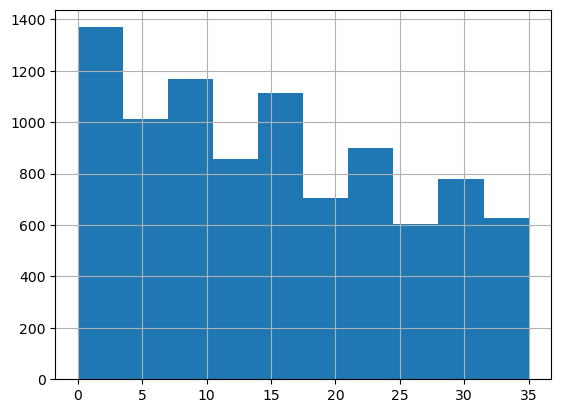

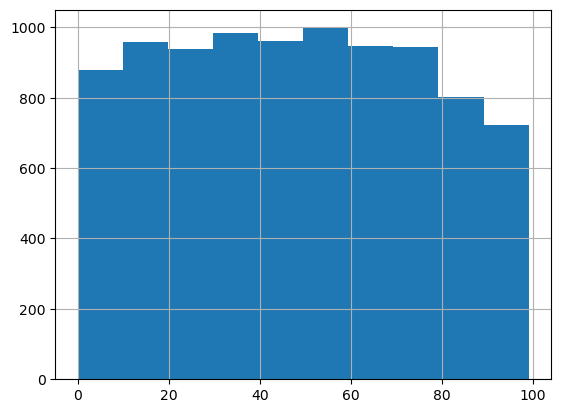

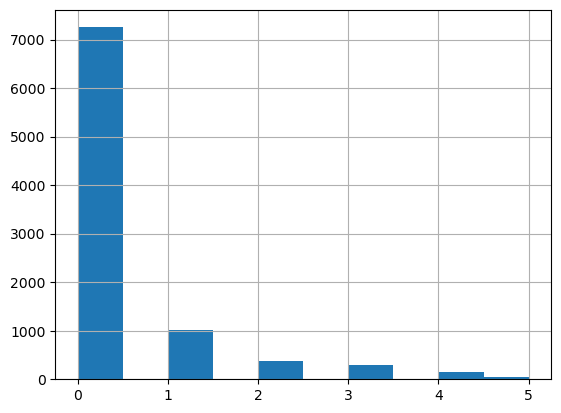

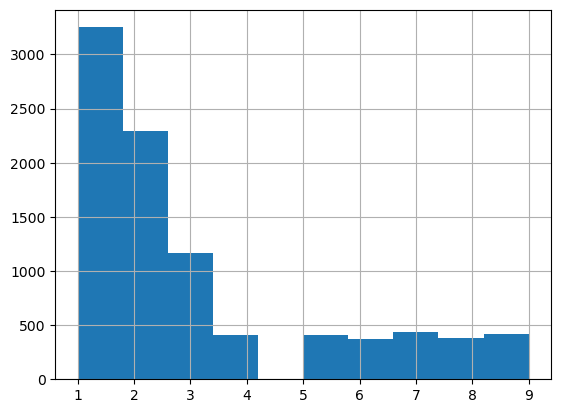

In [66]:
for col in dis_list:
    numerical_df[col].hist(bins=10)
    plt.show()

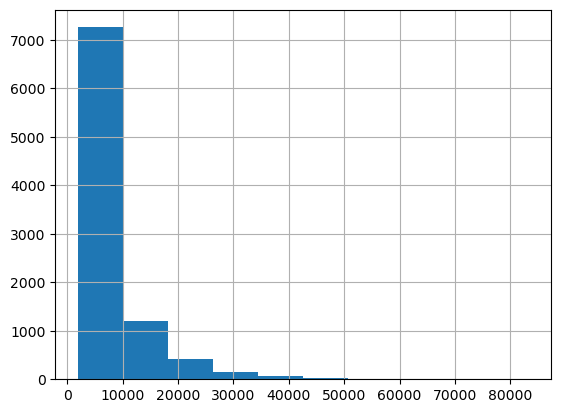

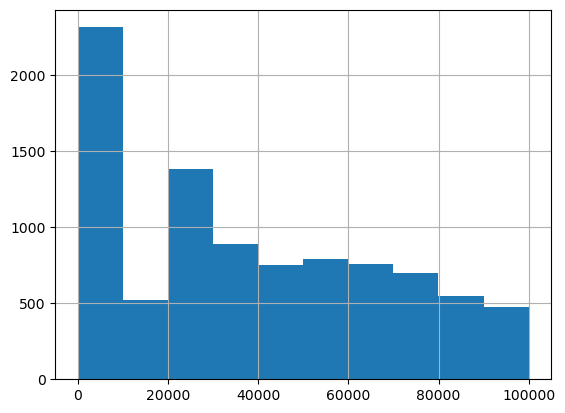

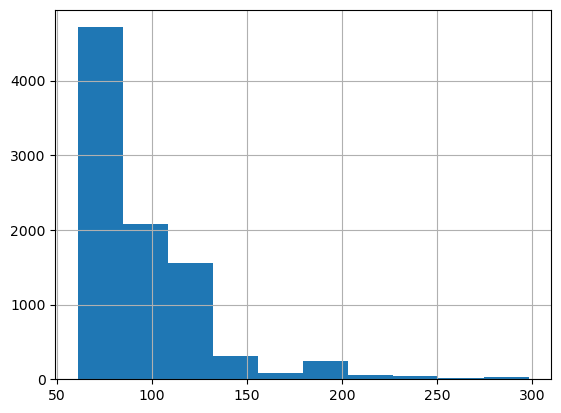

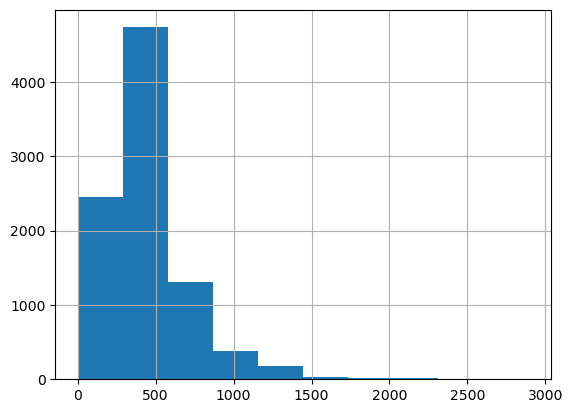

In [67]:
for col in con_list:
    numerical_df[col].hist(bins=10)
    plt.show()

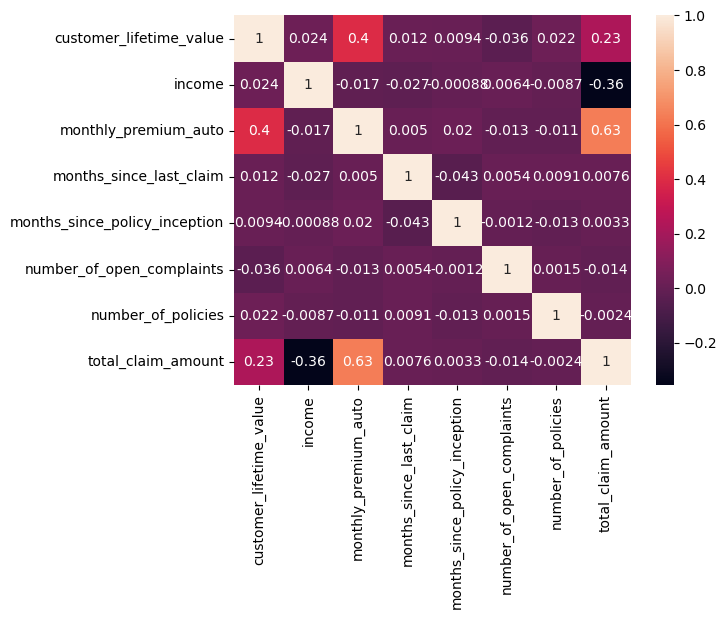

In [68]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [21]:
cols = numerical_df.select_dtypes('number').columns
df_sub = numerical_df.loc[:, cols]

lim = np.logical_and(df_sub < df_sub.quantile(0.99, numeric_only=False),
                     df_sub > df_sub.quantile(0.01, numeric_only=False))

lim

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,True,True,True,True,True,False,False,True
1,True,False,True,True,True,False,True,True
2,True,True,True,True,True,False,True,True
3,True,False,True,True,True,False,True,True
4,True,True,True,True,True,False,False,True
...,...,...,...,...,...,...,...,...
9129,True,True,True,True,True,False,True,True
9130,True,True,True,True,True,False,False,True
9131,True,False,True,True,True,True,True,True
9132,True,True,True,True,True,False,True,True


In [81]:
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

customer_lifetime_value           4967.915247
income                           62320.000000
monthly_premium_auto                41.000000
months_since_last_claim             17.000000
months_since_policy_inception       47.000000
number_of_open_complaints            0.000000
number_of_policies                   3.000000
total_claim_amount                 275.256594
dtype: float64


In [82]:
print(numerical_df < (Q1 - 1.5 * IQR)) |(numerical_df > (Q3 + 1.5 * IQR))


      customer_lifetime_value  income  monthly_premium_auto  \
0                       False   False                 False   
1                       False   False                 False   
2                       False   False                 False   
3                       False   False                 False   
4                       False   False                 False   
...                       ...     ...                   ...   
9129                    False   False                 False   
9130                    False   False                 False   
9131                    False   False                 False   
9132                    False   False                 False   
9133                    False   False                 False   

      months_since_last_claim  months_since_policy_inception  \
0                       False                          False   
1                       False                          False   
2                       False                      

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [83]:
print(numerical_df.skew())
numerical_df.describe()

customer_lifetime_value          3.032280
income                           0.286887
monthly_premium_auto             2.123546
months_since_last_claim          0.278586
months_since_policy_inception    0.040165
number_of_open_complaints        2.783263
number_of_policies               1.253333
total_claim_amount               1.714966
dtype: float64


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<AxesSubplot:>

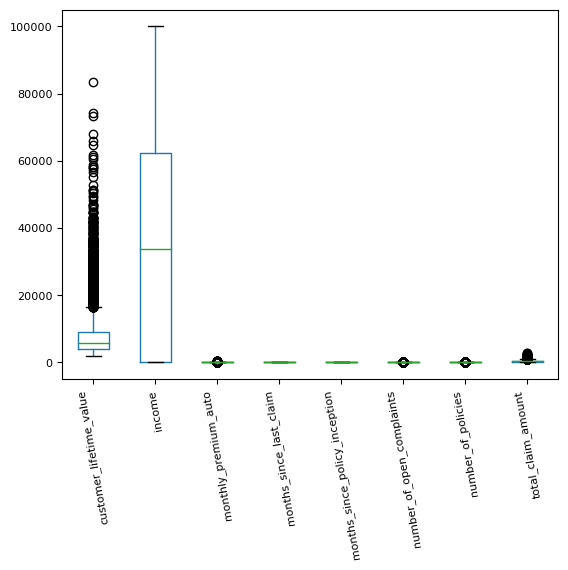

In [22]:
numerical_df.boxplot(grid=False, rot=100, fontsize=8)

<AxesSubplot:>

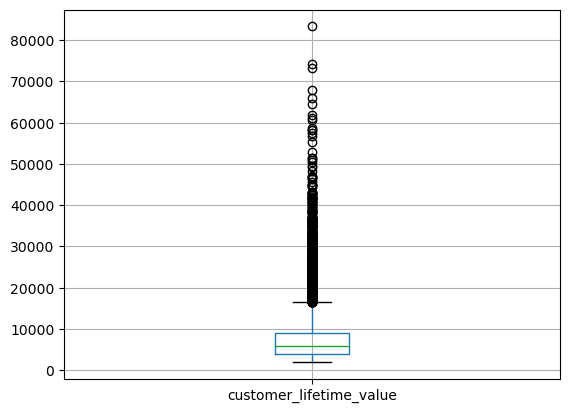

In [23]:
numerical_df.boxplot(column=['customer_lifetime_value'])

In [85]:
print(numerical_df['customer_lifetime_value'].quantile(0.10))
print(numerical_df['customer_lifetime_value'].quantile(0.90))


2661.7578346
15433.385306000006


In [87]:
numerical_df["customer_lifetime_value"] = np.where(numerical_df["customer_lifetime_value"] <2662.0, 2662.0,numerical_df['customer_lifetime_value'])
numerical_df["customer_lifetime_value"] = np.where(numerical_df["customer_lifetime_value"] >15433.0, 15433.0,numerical_df['customer_lifetime_value'])
print(numerical_df['customer_lifetime_value'].skew())

0.8822145565513336


<AxesSubplot:>

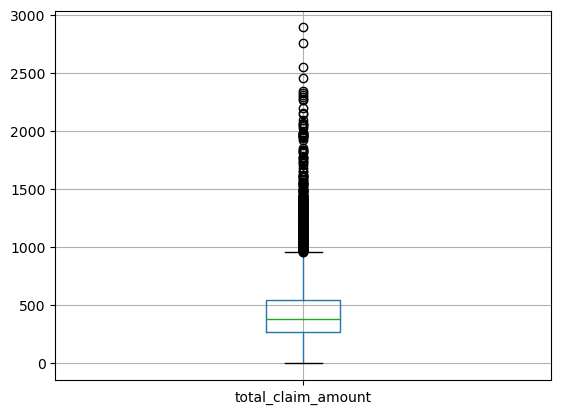

In [88]:
numerical_df.boxplot(column=['total_claim_amount'])

In [90]:
print(numerical_df['total_claim_amount'].quantile(0.10))
print(numerical_df['total_claim_amount'].quantile(0.90))

104.08485470000001
773.4335034000001


In [91]:
numerical_df['total_claim_amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

In [96]:
numerical_df["total_claim_amount"] = np.where(numerical_df["total_claim_amount"] <104.0, 104.0,numerical_df['total_claim_amount'])
numerical_df["total_claim_amount"] = np.where(numerical_df["total_claim_amount"] >773.0, 773.0,numerical_df['total_claim_amount'])
print(numerical_df['total_claim_amount'].skew())


0.24916411183523468


<AxesSubplot:>

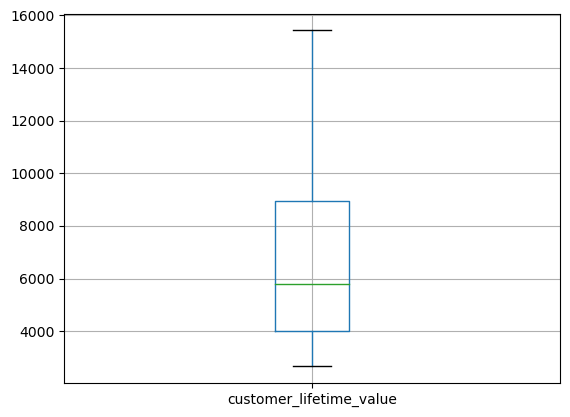

In [97]:
numerical_df.boxplot(column=['customer_lifetime_value'])

<AxesSubplot:>

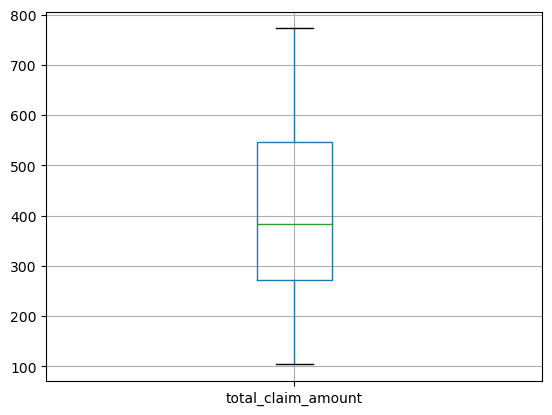

In [98]:
numerical_df.boxplot(column=['total_claim_amount'])

In [106]:
numerical_df.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [107]:
numerical_df.to_csv("numerical.csv")